In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
## DATA PREPROCESSING ##

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
df.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

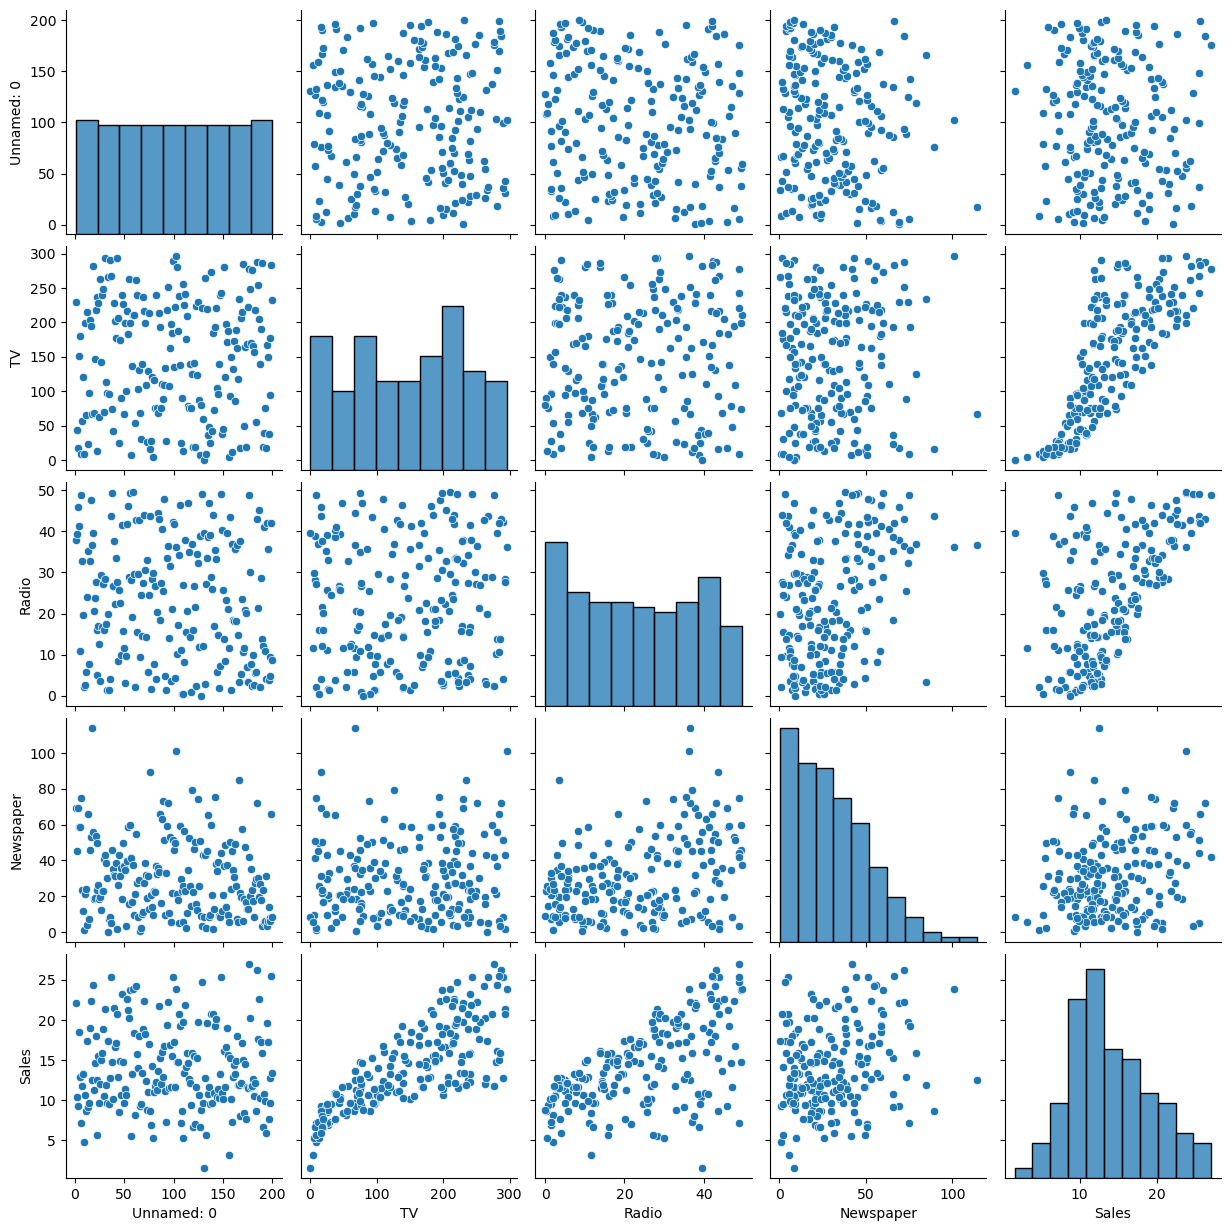

In [11]:
## VISUALIZATION ##

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)


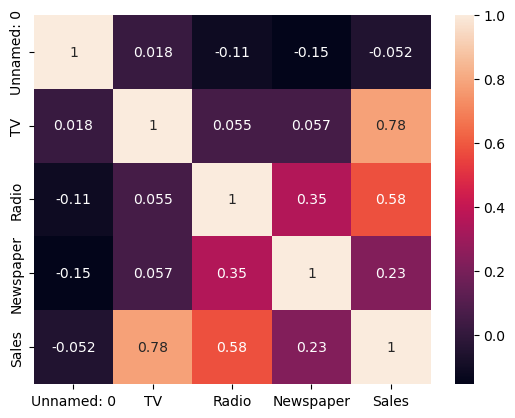

In [12]:

sns.heatmap(df.corr(),annot=True)
plt.show()

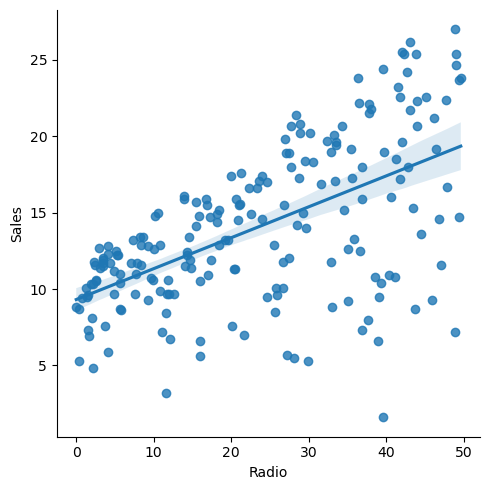

In [13]:
sns.lmplot(data=df,x='Radio',y="Sales")
plt.show()

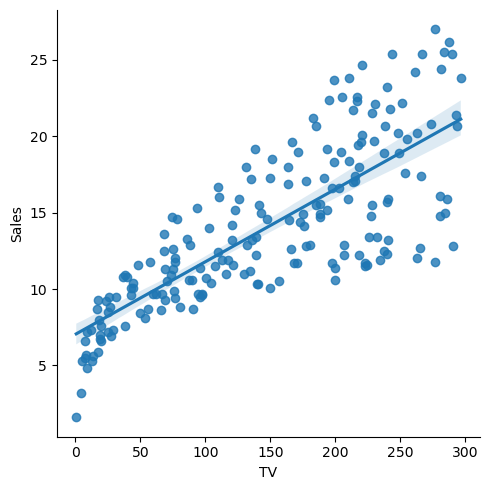

In [14]:
sns.lmplot(data=df,x='TV',y="Sales")
plt.show()

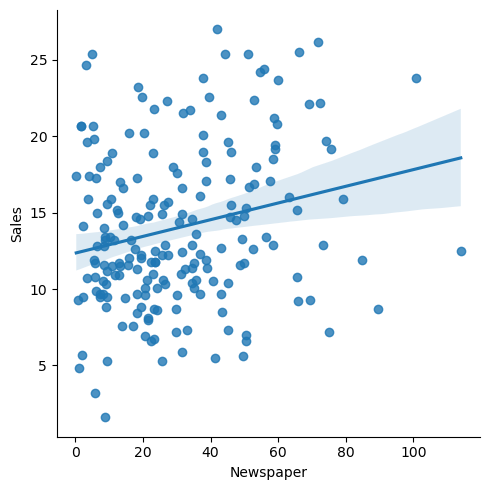

In [15]:
sns.lmplot(data=df,x='Newspaper',y="Sales")
plt.show()

In [16]:
## Splitting the data ##

x=df[['TV','Radio','Newspaper']]
y=df['Sales']
print(len(x), len(y))
print(x)
print(y)
print(x.shape)
print(y.shape)



200 200
        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64
(200, 3)
(200,)


In [17]:
## Training and Test Data ##
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=1/10,random_state=0)

In [18]:
## Linear Regression ##

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.7556846087219637

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [20]:
t_data_predic = regressor.predict(x_train)

In [21]:
## Error Calculation ##

from sklearn import metrics
error_score = metrics.r2_score(y_train, t_data_predic)
print("R squared Error : ", error_score)

R squared Error :  0.9126527610435033


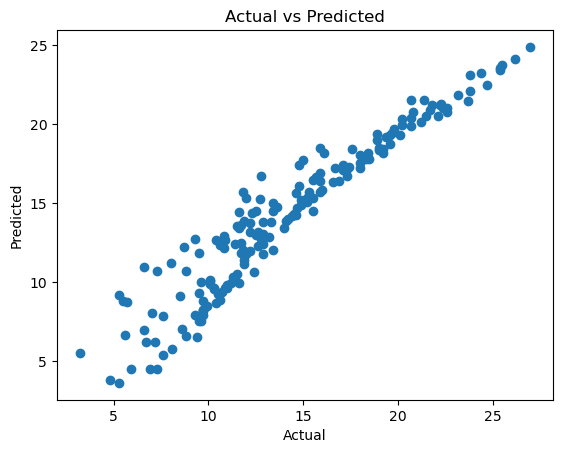

In [22]:
## Plotting THE data ## 

plt.scatter(y_train, t_data_predic)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

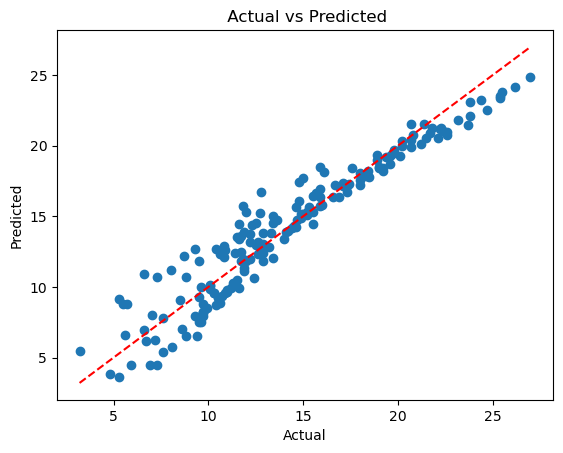

In [26]:
## Adding the linear line ##

plt.scatter(y_train, t_data_predic)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(" Actual vs Predicted")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.show()

In [24]:
b = regressor.coef_
print("Coefficient :",b)

Coefficient : [ 0.04445735  0.19820881 -0.00245565]


In [25]:
a = regressor.intercept_
print("Intercept :",a)

Intercept : 3.0013503531930663
